In [29]:
import numpy as np
def altura(t):
    return (-245.25*np.exp(-0.4*t)-24.525*t+545.25)

def tiempoinicio(t):
    return (-245.25*np.exp(-0.4*t)-24.525*t+545.25)-300
    

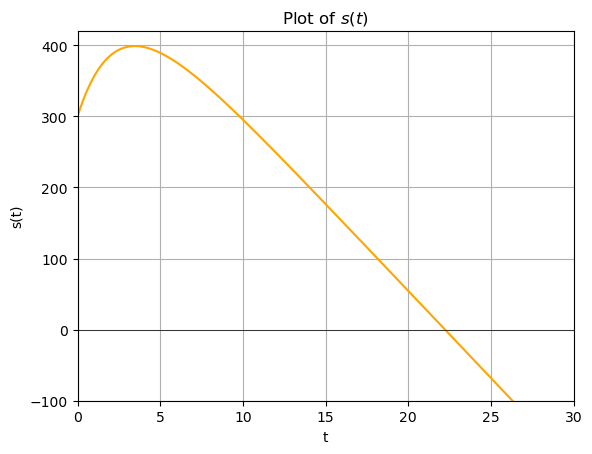

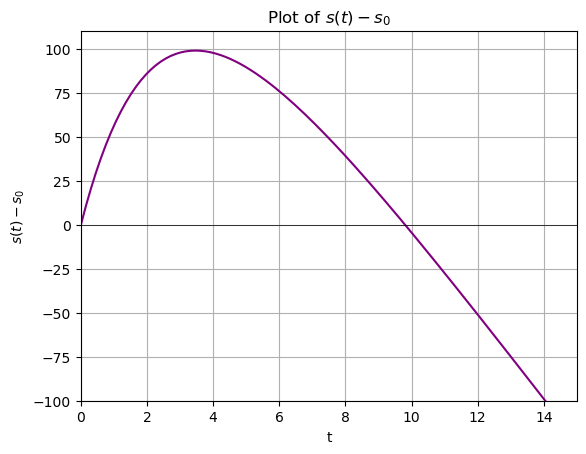

In [31]:
import matplotlib.pyplot as plt
# Generate x values
x = np.linspace(0, 30, 200)

# Calculate y values
y1 = altura(x)
y2 = tiempoinicio(x)
# Plot the equation
plt.plot(x, y1, label = '$s(t)$', color = 'orange')
plt.xlabel('t')
plt.ylabel('s(t)')
plt.title('Plot of $s(t)$')
ax = plt.gca()
ax.set_ylim([-100,420])
ax.set_xlim([0, 30])
plt.grid(True)
# Marca los ejes coordenados
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

plt.plot(x, y2, label = '$s(t)-s_{0}$', color = 'purple')
plt.xlabel('t')
plt.ylabel('$s(t)-s_{0}$')
plt.title('Plot of $s(t)-s_{0}$')
ax = plt.gca()
ax.set_ylim([-100,110])
ax.set_xlim([0, 15])
plt.grid(True)
# Marca los ejes coordenados
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

In [33]:
from typing import Callable
def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [35]:
def bisection(
    a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int
) -> tuple[float, float, float, int] | None:
    i = 1
    assert a < b, "a not lower than b, the interval is not valid."

    assert (equation(a) * equation(b) < 0), "The function does not change sign over the interval."

    Fa = equation(a)
    p = a # to avoid crash in i == 0.
    for i in range(1,N+1):
        p = a + (b - a) / 2
        FP = equation(p)
        if FP == 0 or (b - a) / 2 < tol:
            return p, a, b, i

        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
        else:
            b = p
    print("Solución no encontrada, número de iteraciones insuficiente para la tolerancia dada.")

Tiempo desde que pasa por la altura $s_{0}$ y comienza su caída libre:

In [37]:
a = 1
b = 20
tol = 10**(-2)
result1 = bisection(a=a,b=b,equation=tiempoinicio,tol=tol,N=20)
print("El tiempo que pasó antes de empezar su caída libre es: "+format(result1[0],".5")+" segundos") 

El tiempo que pasó antes de empezar su caída libre es: 9.8042 segundos


Tiempo que tarda el objeto en llegar al suelo luego de haber sido lanzado:

In [40]:
a = 1
b = 30
tol = 10**(-2)
result2 = bisection(a=a,b=b,equation=altura,tol=tol,N=20)
print("El tiempo en que llega al suelo desde que se lanzó es: "+format(result2[0],".5")+" segundos") 

El tiempo en que llega al suelo desde que se lanzó es: 22.233 segundos


Tiempo que le toma al objeto para llegar al suelo dese que comienza su movimiento en caída libre:

In [43]:
result = result2[0] -result1[0]
print("El tiempo que tardó en caer desde que pasó por la posición inicial es: "+format(result,".5"), "segundos")

El tiempo que tardó en caer desde que pasó por la posición inicial es: 12.429 segundos
